In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we import libraries that we are going to use

In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we define a class that can calculate polynomial regression with getting train data, target column, dimensions, epoch & learning rate.
In this class we define some function for this job.

#normalize:#
In here, first we calculate train data's power that are determined in the dimension list and put the resluts in a np.array object.
Then we calculate mean and var for all columns in we calculated in the prevoius part and store them in a np.array object.(In case that we can use them on the test data)
And we also find the normalized (standardized) data by this var and mean arrays.

#gradian_function:#
This gradian function is exactly the same as linear gradian_function.

#cost_function_simplified:#
This cost function is exactly the same as linear cost_function.

#PR_GD:#
Here we fist normalize data using the function normalize().
then we make random weights vector by using random.random() function. But we multiplies numbers by 1000000000 because when we normalize data, data range (specialy for powers more than 1 or 2) is very low, so we do this just to make the this weights acceptable. (If we don't do this, our PR_GD function, can only find the bias parameter (w of the 0 power of the traing data) correctly, and it won't fluctuate in an appropriate order, it almost fluctuate in 0.00001)
Then we run the algorithm epoch times.

#test:#
Here we use the weight vector that we figured in the previous part and the test data (after we calculated power of test data by the dimensions list and normalizing them using mean & var narrays) and we draw plots of the result.

In [7]:
class Polynomial_Regression:
  def __init__(self, train, target, dimensions, learning_rate, epoch):
    self.train = train.to_numpy()
    self.target = target.to_numpy()
    self.dimensions = dimensions
    self.learning_rate = learning_rate
    self.epoch = epoch
  
  # def normalize(self):
  #   self.mean = np.mean(self.train)
  #   self.var = np.var(self.train)
  #   self.x = (self.train - self.mean) / self.var
  #   self.x = np.array([(np.array(self.x) ** x) for x in self.dimensions])
  #   self.x = np.transpose(self.x)

  def normalize(self):
    self.x = np.array([self.train ** dim for dim in dimensions])
    self.mean = np.array([np.mean(i) for i in self.x])
    self.var = np.array([np.var(i) for i in self.x])
    self.x = np.array([(self.x[i] - self.mean[i]) / self.var[i] if self.var[i] != 0 else self.x[i] for i in range(len(self.x))])
    self.x = np.transpose(self.x)

  def gradian_function(self, predict, w):
    return np.dot(predict - self.target, self.x) / len(self.x)

  def cost_function_simplified(self, predicts):
    return np.sum((predicts - self.target) ** 2) / (2 * len(self.target))

  def PR_GD(self):
    self.normalize()
    w = np.array([random.random() * (10 ** (9)) if x != 0 else random.random() for x in self.dimensions])
    print('Random Weights: ', w)
    predict = np.dot(self.x, w)
    costs = []
    cost = self.cost_function_simplified(predict)
    costs.append(cost)
    for i in range(self.epoch):
      gradian = self.gradian_function(predict, w)
      # print('gradian')
      # print(gradian)
      w = w - (self.learning_rate * gradian)
      predict = np.dot(self.x, w)
      cost = self.cost_function_simplified(predict)
      costs.append(cost)
    print('Final Cost: ', cost)
    plt.plot([i for i in range(len(costs))], costs)
    plt.xlabel('Test Number')
    plt.ylabel('Cost Function')
    plt.title('Cost-Function-Result')
    plt.savefig("Cost-Function-Image.png")
    plt.show()
    return w
  
  def test(self, w, test, correct):
    # test = np.array((test - self.mean) / self.var)
    test = np.array([(test ** x) for x in self.dimensions])
    test = np.array([np.array((test[i] - self.mean[i]) / self.var[i]) if self.var[i] != 0 else test[i] for i in range(len(test))])
    test = np.transpose(test)
    print('test[0]: ', test[0])
    predict = np.dot(test, weights)
    print('Predict:')
    print(predict)
    # plt.scatter([x for x in test_copy], np.array(correct), color='b')
    # plt.scatter([x for x in test_copy], np.array(predict), color='r')
    plt.plot([x for x in range(len(correct))], np.array(correct), color='b')
    plt.plot([x for x in range(len(predict))], np.array(predict), color='r')
    plt.xlabel('Number')
    # plt.xlabel('Mileage')
    plt.ylabel('Price/Predict')
    # dff = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
    # lable = dff.iloc[len(dff) - 100:, :]
    # lable = np.array(lable['Mileage'])
    # plt.scatter(lable, np.array(correct), color='b')
    # plt.scatter(lable, np.array(predict), color='r')
    # plt.savefig('Predict-Terget*Mileage.png')
    plt.show()
    mins = [min(correct), min(predict)]
    maxs = [max(correct), max(predict)]
    plt.plot([min(mins), max(maxs)], [min(mins), max(maxs)])
    plt.scatter(predict, correct)
    plt.xlabel('Predict')
    plt.ylabel('Price')
    # plt.savefig('Terget*Predict.png')
    plt.show()

Random Weights:  [7.09912565e-02 2.59672558e+08 3.52409107e+08 9.65658133e+08
 4.92203257e+08]
Final Cost:  100804830.22280751


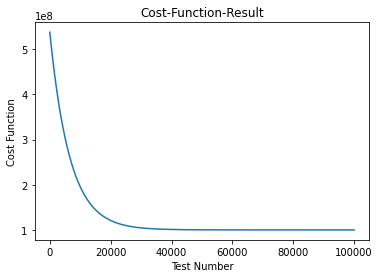

weights:  [2.95069009e+04 2.59672556e+08 3.52409107e+08 9.65658133e+08
 4.92203257e+08]
test[0]:  [ 1.00000000e+00 -7.76038054e-06 -9.34515623e-12 -2.99790055e-18
  9.40110270e-20]
Predict:
[27491.7397657  28559.87287964 28566.68340665 25327.0191363
 28869.51862866 28639.36012685 35299.40596658 29054.33581821
 31824.82168758 25453.060472   25132.40609427 38776.04459182
 32583.86934204 32012.15792445 26394.96530517 41811.58591899
 28116.90875451 26270.88314324 26240.74890427 26344.49278639
 25963.29000466 27354.31641596 24283.51638793 27701.6532383
 26431.25700561 24950.20127161 28424.22211023 24707.35481083
 28590.94007826 25164.87269916 33125.91301378 26449.72938792
 29343.08353273 28653.26106572 25004.87204736 35384.49099542
 28966.54532014 37685.14581555 32114.68906435 28812.70203787
 27833.66549232 33245.70373838 34794.95999057 25818.68298366
 25824.84044385 26660.48248068 28868.49238481 27182.28067198
 26218.35813857 27012.763894   37024.15062276 38583.95011346
 28152.64069524 239

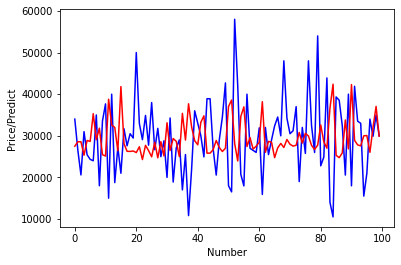

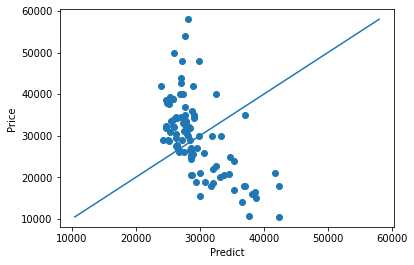

In [31]:
df = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q2/data.csv')
train_limit_number = len(df) - 100
test = df.iloc[train_limit_number:, :]
df = df.iloc[:train_limit_number, :]
dimensions = list(range(5))
train = df['Mileage']
target = df['Price']
learning_rate = 0.000076094
epoch = 100000
pr = Polynomial_Regression(train, target, dimensions, learning_rate, epoch)
weights = pr.PR_GD()
print('weights: ', weights)
pr.test(weights, test['Mileage'].to_numpy(), test['Price'].to_numpy())

In [ ]:
# class Linear_Regression:
#   def __init__(self, x, target, columns, learning_rate, epoch, non_numeric_columns, convert_to_vector):
#     self.columns = columns
#     self.x = x
#     self.target = target
#     self.learning_rate = learning_rate
#     self.epoch = epoch
#     self.non_numeric_columns = non_numeric_columns
#     self.non_numeric_dic = {}
#     self.convert_to_vector = convert_to_vector
#     self.convert_to_vector_value = {}
#     self.final_columns = self.columns.copy()

#   def one_hot_encode(self, dictionary, values):
#     for x in values:
#         if x not in dictionary.keys():
#             dictionary[x] = len(dictionary)

#   def one_hot_decode(self, dictionary, key):
#     if key in dictionary.keys():
#         return dictionary[key]
#     dictionary[key] = len(dictionary)
#     return dictionary[key]

#   def convert_to_numeric(self):
#     for i in self.non_numeric_columns:
#       dictionary = {}
#       self.non_numeric_dic[i] = dictionary
#       self.one_hot_encode(dictionary, self.x[i].values)
#       self.x[i] = [self.one_hot_decode(dictionary, j) for j in self.x[i].values]

#   def normalize(self):
#     self.normalize_dictionary = {}
#     for i in self.final_columns:
#       if i in self.convert_to_vector:
#         continue
#       mean = np.mean(self.x[i])
#       var = np.var(self.x[i])
#       self.x[i] = (self.x[i] - mean) / var
#       self.normalize_dictionary[i] = {'mean':mean, 'var':var}
  
#   def gradian_function(self, predict, w, x_vector):
#     return np.dot(predict - self.target, x_vector) / len(x_vector)

#   def cost_function_simplified(self, predicts):
#     return np.sum((predicts - self.target) ** 2) / (2 * len(self.target))

#   def convert_columns_to_Vector(self):
#     for i in self.convert_to_vector:
#       if i in self.final_columns:
#         self.convert_to_vector_value[i] = self.x[i].nunique()
#         self.final_columns.remove(i)
#       count = self.convert_to_vector_value[i]
#       for j in range(count):
#         self.final_columns.append(i + str(j))
#         self.x[i + str(j)] = np.where(self.x[i] == j, 1, 0)

#   def LR_GD(self):
#     self.convert_to_numeric()
#     self.normalize()
#     self.convert_columns_to_Vector()
#     x_vector = self.x.loc[:, self.final_columns].to_numpy()
#     # Adding A New Column With Value 1, Just To Set The Bias Along Side With W
#     bias = np.ones(len(self.x))
#     x_vector = np.c_[x_vector, bias]
#     w = [random.random() for x in range(len(self.final_columns) + 1)]
#     # w = [random.random() for x in range(len(columns))]
#     # w.append(np.mean(self.target))
#     predict = np.dot(x_vector, w)
#     costs = []
#     cost = self.cost_function_simplified(predict)
#     costs.append(cost)
#     for i in range(self.epoch):
#       gradian = self.gradian_function(predict, w, x_vector)
#       w = w - (self.learning_rate * gradian)
#       predict = np.dot(x_vector, w)
#       predict = np.array(predict)
#       cost = self.cost_function_simplified(predict)
#       costs.append(cost)
#     plt.plot([i for i in range(len(costs))], costs)
#     plt.xlabel('Test Number')
#     plt.ylabel('Cost Function')
#     plt.title('Cost-Function-Result')
#     plt.savefig("Cost-Function-Image.png")
#     plt.show()
#     return w

#   def test(self, x_vector, target, w, show_plot = True, path = ''):
#     for col in self.non_numeric_columns:
#       dic = self.non_numeric_dic[col]
#       x_vector[col] = [self.one_hot_decode(dic, i) for i in x_vector[col].values]

#     for col in self.columns:
#       if col in self.convert_to_vector:
#         continue
#       dic = self.normalize_dictionary[col]
#       x_vector[col] = [(i - dic['mean']) / dic['var'] for i in x_vector[col]]

#     for i in self.convert_to_vector:
#       count = self.convert_to_vector_value[i]
#       for j in range(count):
#         x_vector[i + str(j)] = np.where(x_vector[i] == j, 1, 0)

#     x_matrix = x_vector.loc[:, self.final_columns].to_numpy()
#     bias_matrix = np.ones(len(x_vector))
#     x_matrix = np.c_[x_matrix, bias_matrix]
#     predict = np.absolute(np.dot(x_matrix, w))
#     if not show_plot:
#       df = pd.read_csv('/content/drive/MyDrive/ML_HW2_Q1/test.csv')
#       df['Price'] = predict
#       df.loc[:,['Price', 'CarId']].to_csv('/content/predict.csv', index = False)
#       return
#     plt.plot([x for x in range(len(target))], np.array(target), color='b')
#     plt.plot([x for x in range(len(predict))], np.array(predict), color='r')
#     plt.savefig('Test.png')
#     plt.show()
#     mins = [min(target), min(predict)]
#     maxs = [max(target), max(predict)]
#     plt.plot([min(mins), max(maxs)], [min(mins), max(maxs)])
#     plt.scatter(predict, target)
#     plt.xlabel('Predicted Price')
#     plt.ylabel('Price')
#     plt.savefig('Professional-Result.png')
#     plt.show()